# Surfinpy

#### Tutorial 4 -Temperature vs Pressure Phase Diagram

In tutorial 2, we showed how experimental data could be used to determine the temperature dependent free energy term for gaseous species and then plot a phase diagram that represents 298 K.  This same method can be used in conjuction with a temperature range to produce a phase diagram of temperature as a function of pressure (or chemical potential).  This is an important step to producing relatable phase diagrams that can be compared to experimental findings.

##### Methodology 

To reiterate, the free energy can be calculated using;

\begin{align}
\Delta G^{0}_{f} = \sum\Delta G_{f}^{0,\text{products}} - \sum\Delta G_{f}^{0,\text{reactants}}
\end{align}


Where for this tutorial the free energy (G) for solid phases  is equal to is equal to the calculated DFT energy (U<sub>0</sub>). For gaseous species, the standard free energy varies significantly with temperature, and as DFT simulations are designed for condensed phase systems, we use experimental data to determine the temperature dependent free energy term for gaseous species, where $S_{\text{expt}}(T)$ is specific entropy value for a given T and  $H-H^0(T)$ is the , both can be obtained from the NIST database and can be calculated as;

\begin{align}
G =  U_0 + (H-H^0(T) - T S_{\text{expt}}(T))
\end{align}

##### Code

In [1]:
import matplotlib.pyplot as plt

from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import bulk_mu_vs_t as bmvt
from surfinpy import data
import numpy as np

colors = ['#5B9BD5', '#4472C4', '#A5A5A5', '#772C24', '#ED7D31', '#FFC000', '#70AD47']


temperature_range sets the temperature range which is calculated for the phase diagram and needs to be specified within the data ReferenceDataSet and DataSet.

In [2]:
temperature_range = [200, 400]

In [3]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10, file = 'bulk_vib.yaml', temp_range=temperature_range)

In [4]:

MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92., color=colors[0],
                   label = "Periclase", file = 'MgO_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.,  color=colors[1],
                   label = "Magnesite", file = 'Mag_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -227.,  color=colors[2],
                   label = "Brucite", file = 'Bru_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.,  color=colors[3],
                   label = "Hydromagnesite", file = 'Hyd_vib.yaml', 
                   funits =  2, temp_range=temperature_range)

Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -467.,  color=colors[4],
                   label = "Artinite", file = 'Art_vib.yaml', 
                   funits = 5, temp_range=temperature_range)

Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -705.,  color=colors[5],
                   label = "Nesquehonite", file = 'Nes_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -971.,  color=colors[6],
                   label = "Lansfordite", file = 'Lan_vib.yaml', 
                   funits =  10, temp_range=temperature_range)


In [5]:
data = [MgO, Art, Bru, Nes,  Mag, Lan, Hyd]

deltaZ specifies the temperature range which is plotted (Note that this must be the same as temperature_range).  mu_y is the chemical potential (eV) of third component, in this example we use a chemical potential of water = 0 eV which is equivalent to 1 bar pressure. 

In [6]:
# Do we want to switch y_energy to z_energy for this example and be consistent.  If so what do we do about the dataset being y.  Can see this being confusing to a new user
# Changed y and z so now y is same as dataset and z is the temp range

In [7]:
deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaZ = {'Range': [ 200, 400], 'Label': 'Temperature'}
x_energy=-20.53412969
y_energy=-12.83725889
mu_y = 0

In [8]:
exp_x = ut.temperature_correction_range("CO2.txt", deltaZ)
exp_y = ut.temperature_correction_range("H2O.txt", deltaZ)

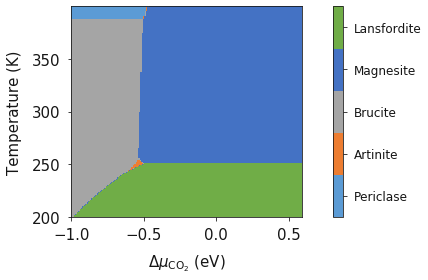

In [9]:
system = bmvt.calculate(data, bulk, deltaX, deltaZ, x_energy, y_energy, mu_y, exp_x, exp_y)
ax = system.plot_mu_vs_t(figsize=(6, 4))

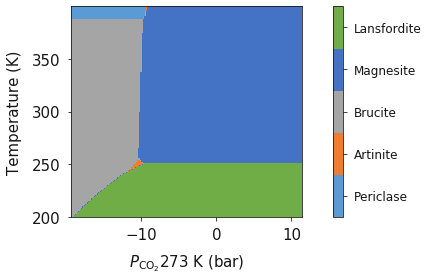

In [10]:
system.plot_p_vs_t(temperature=273, set_style="seaborn-dark-palette", figsize=(6, 4))

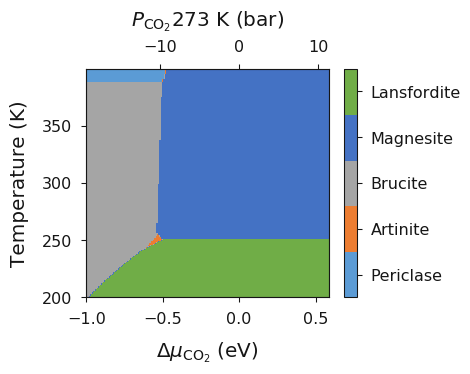

In [11]:
ax = system.plot_mu_vs_t_vs_p(temperature=273, set_style="seaborn-dark-palette", figsize=(5, 4))